## **Model LSTM_RNN**

---

Uji Coba #1

Penelitian                             : [IndoNLU](https://github.com/IndoNLP/indonlu)

In [52]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random
import numpy as np
import pandas as pd

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
train = pd.read_csv('..\Dataset\\Sentimen\\train_preprocess.csv')
val = pd.read_csv('..\Dataset\\Sentimen\\valid_preprocess.csv')
test = pd.read_csv('..\Dataset\\Sentimen\\valid_preprocess.csv')

In [55]:
def get_tweets(data):
    labels = data['label'].tolist()  
    tweets = data['tweet'].tolist()  
    return tweets, labels

# Memanggil fungsi get_tweets dengan DataFrame train
tweets, labels = get_tweets(train)

In [56]:
tweets[10], labels[10]

('simcard indosat inaktiv gara-gara lupa isi pulsa dan kabar nya aktif jika pinda ke pasca bayar , ribet banget',
 'negative')

In [57]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [58]:
tokenizer = Tokenizer(num_words=1000, oov_token='<UNK>')

tokenizer.fit_on_texts(tweets)

print(tokenizer.texts_to_sequences([tweets[10]]))

[[1, 315, 1, 529, 529, 328, 382, 878, 4, 1, 2, 1, 148, 1, 16, 1, 396, 1, 28]]


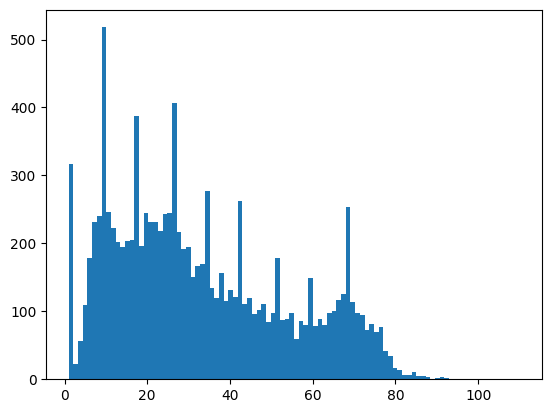

In [78]:
lengths = [len(t.split(' ')) for t in tweets]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [60]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [61]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

In [62]:
padded_train_sequences = get_sequences(tokenizer, tweets)

In [63]:
padded_train_sequences[10]

array([  1, 315,   1, 529, 529, 328, 382, 878,   4,   1,   2,   1, 148,
         1,  16,   1, 396,   1,  28,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [64]:
classes = set(labels)
print(classes)

{'negative', 'neutral', 'positive'}


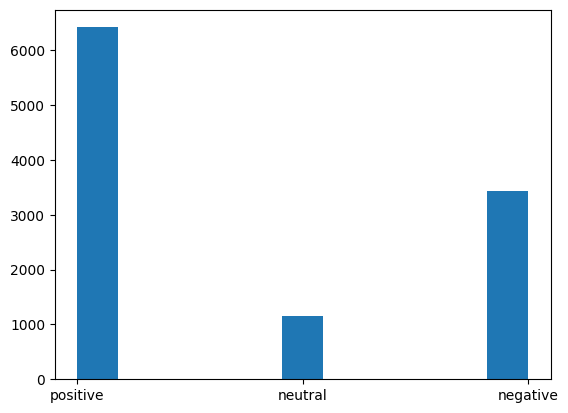

In [65]:
plt.hist(labels, bins=11)
plt.show()

In [66]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [67]:
classes_to_index

{'negative': 0, 'neutral': 1, 'positive': 2}

In [68]:
index_to_classes

{0: 'negative', 1: 'neutral', 2: 'positive'}

In [69]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [70]:
train_labels = names_to_ids(labels)
print(train_labels[10])

0


In [1]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


c:\Users\TEMP\miniconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [80]:
val_tweets, val_labels = get_tweets(val)
val_sequences = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [81]:
val_tweets[20], val_labels[20]

('piring kaleng , gelas kaleng , makanan rumahan , es cincau , dan yang terpenting , cumi masak hitam yang tak terkalahkan oleh rumah makan di mana pun . makan ala prasmanan dengan pilihan nasi merah yang cocok bagi pelaku diet , barisan lauk pauk yang bisa kita pilih semau nya , pilihan sambal dan lalapan yang bisa diambil sebanyak kita mau , dan harga yang sangat ramah kantong .',
 2)

In [82]:
h = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=15,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=1)
    ]
)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
Epoch 1/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6796 - loss: 0.7619 - val_accuracy: 0.7802 - val_loss: 0.5415
Epoch 2/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.8150 - loss: 0.4753 - val_accuracy: 0.8302 - val_loss: 0.4380
Epoch 3/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.8581 - loss: 0.3677 - val_accuracy: 0.8532 - val_loss: 0.3821
Epoch 4/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.8832 - loss: 0.3151 - val_accuracy: 0.8683 - val_loss: 0.3389
Epoch 5/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.8929 - loss: 0.2744 - val_accuracy: 0.8714 - val_loss: 0.3354
Epoch 6/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9005 - loss: 0.2644 - val_accuracy: 0.8714 - val_loss: 0.3477


In [75]:
test_tweets, test_labels = get_tweets(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [76]:
eval = model.evaluate(test_sequences, test_labels)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8576 - loss: 0.3696


In [77]:
for a in range(0,5):
  i = random.randint(0, len(test_labels) - 1)

  print('Tweet:', test_tweets[i])
  print('Actual Emotion:', index_to_classes[test_labels[i]])

  # Melakukan prediksi dengan model
  pred_prob = model.predict(np.expand_dims(test_sequences[i], axis=0))

  # Mengambil indeks kelas dengan probabilitas tertinggi
  predicted_class_index = np.argmax(pred_prob)

  # Mendapatkan kelas yang sesuai dari dictionary index_to_classes
  predicted_class = index_to_classes[predicted_class_index]

  # Print hasil prediksi
  print('Predicted Sentimen:', predicted_class, '\n')

Tweet: kenapa ya kalau nyepi mesti matikan lampu ?! toh juga kalau kita melanggar kita yang dosa kan ?! ada saja orang yang buat aturan aneh-aneh . kalau mau nyepi , nyepi saja sendiri-sendiri ! tidak usah merepotkan orang lain !
Actual Emotion: negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Sentimen: negative 

Tweet: payah nih pelayanan nya . sangat tidak direkomendasikan beli alat elektronik di sini . barang yang sampai , barang rusak dan proses ganti baru nya tidak cepat .
Actual Emotion: negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Sentimen: positive 

Tweet: hampir semua makanan yang dibakar digoreng dan sayur-sayuran yang rumahan semuanya enak . tempat nya nyaman dengan ciri khas makan dengan alas daun nya unik
Actual Emotion: positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Sentimen: positive 

Tweet: bukan cuma jujur , edgar itu banyak dicintai masyarakat dan punya pendirian bagus .
Actual Emotion: positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Pred